<big><b><div class="alert alert-success">
Homework_1
</div></b></big>
<div class="alert alert-warning">
1. 將 east, west, xiangshan 三個檔案匯入SAS中,並合併 (以合併的資料做後續動作)
2. 將年齡重新分組 0 ~ 9 為小孩; 10~18 為成人; 19 以上為老人
3. 將死亡原因為不明的個案刪除
4. 留下ID, sex, cause, county 以及年齡分組的變項

**Note**: 以上每小題請在 word 中標記資料筆數及截圖 output 前 六列,並將 output 匯出成  pdf 檔

For the  convenience, the file, Computer-3.ipynb, is put on the top of data as follows:
```
  Computer-3.ipynb
  
  data/east.csv
  data/west.csv
  data/Xiangshan.csv
  
  data/others/students.csv
  data/others/cholesterol.csv
```  

In [1]:
# list the csv files in the subdirectory, data
files  <- list.files(path='data',full.names = TRUE,pattern = '*.csv')

In [2]:
# combine csv files in one
tables <- lapply(files, read.csv, header = TRUE)
combined.df <- do.call(rbind , tables)
dim(combined.df)
combined.df[1,]

[1] 1208    6

,ID,year,county,cause,sex,age_code
1,N50001,101,1205,6,2,24


In [3]:
# combine csv files in one
x1 <- read.csv("data/Xiangshan.csv",header=T,sep=",")
x2 <- read.csv("data/east.csv",header=T,sep=",")
x3 <- read.csv("data/west.csv",header=T,sep=",")
xdata <- rbind(x1,x2,x3)

dim(xdata)
xdata[1,]

[1] 1208    6

,ID,year,county,cause,sex,age_code
1,N50001,101,1205,6,2,24


In [4]:
# function used to show the computing result
#    answer(expression,variable)
answer <- function(arg1,arg2){
    cat(sprintf(arg1,arg2))
}

In [5]:
data1<-combined.df 
express1<-"Homework_1 (1)\n  
  a) Three CSV had been read and combined together;\n
  b) the total size of the combined CSV data is %d."
answer(express1,length(data1$ID))

Homework_1 (1)
  
  a) Three CSV had been read and combined together;

  b) the total size of the combined CSV data is 1208.

Add the new column, "age", grouped by the following ranges: 
```
   0, ------, 9, 10, ------, 18, 19, ------
   
      child          adult            elder 
```      

In [6]:
len<-length(data1$age)
for (i in 1:len){
   if (data1$age_code[i]<=9) {
      data1$age[i]="child"
   } else{
       if (data1$age_code[i]>=19){
           data1$age[i]="elder"
       }else{
           data1$age[i]="adult"
       }
   }    
}

In [7]:
len<-length(data1$age)
for (i in 1:len){
   if (data1$age_code[i]<=9) {
      data1$class[i]="child"
   } else{
       if (data1$age_code[i]>=19){
           data1$class[i]="elder"
       }else{
           data1$class[i]="adult"
       }
   }    
}

In [8]:
data1[1:10,]

,ID,year,county,cause,sex,age_code,age,class
1,N50001,101,1205,6,2,24,elder,elder
2,N50002,101,1205,6,1,24,elder,elder
3,N50003,101,1205,8,1,21,elder,elder
4,N50004,101,1205,15,2,19,elder,elder
5,N50005,101,1205,15,2,21,elder,elder
6,N50006,101,1205,15,1,21,elder,elder
7,N50007,101,1205,15,1,23,elder,elder
8,N50008,101,1205,15,2,24,elder,elder
9,N50009,101,1205,16,1,13,adult,adult
10,N50010,101,1205,16,2,15,adult,adult


In [9]:
nchild<-sum(data1$class=="child")
nadult<-sum(data1$class=="adult")
nelder<-sum(data1$class=="elder")

In [10]:
nanlen11<-length(data1$ID)
express11<-"Homework_1 (2)\n  
  Data has been categoryed into three classes by the column, age_code, 
and the sizes in class are listed as follows:\n
  a)  0 ~  9: %d;\n
  b) 10 ~ 18: %d;\n
  c) 19 ~   : %d;\n
There are %d in total. 
"
cat(sprintf(express11,nchild,nadult,nelder,nanlen11))

Homework_1 (2)
  
  Data has been categoryed into three classes by the column, age_code, 
and the sizes in class are listed as follows:

  a)  0 ~  9: 10;

  b) 10 ~ 18: 451;

  c) 19 ~   : 747;

There are 1208 in total. 


In [11]:
# the cases with "NA" cause
datanan<-data1[is.na(data1$cause),]
datanan

,ID,year,county,cause,sex,age_code,age,class
229,R10010,101,1201,NA,1,21,elder,elder
248,R10029,101,1201,NA,1,21,elder,elder
274,R10055,101,1201,NA,1,20,elder,elder
292,R10073,101,1201,NA,1,23,elder,elder
307,R10088,101,1201,NA,1,14,adult,adult
324,R10105,101,1201,NA,2,24,elder,elder
377,R10158,101,1201,NA,1,24,elder,elder
413,R10194,101,1201,NA,2,20,elder,elder
460,R10241,101,1201,NA,2,23,elder,elder
490,R10271,101,1201,NA,1,23,elder,elder


In [12]:
data2<-data1[!is.na(data1$cause),]
nanlen<-length(data2$ID)
nanlen

[1] 1195

In [13]:
express13<-"Homework_1 (3)\n  
  There are %d records being NA in cause column. 
  After removing cases with unknown death cause, the left size of cases is %d."
cat(sprintf(express13,length(datanan[,1]),nanlen))

Homework_1 (3)
  
  There are 13 records being NA in cause column. 
  After removing cases with unknown death cause, the left size of cases is 1195.

In [14]:
data2$year<-NULL
data2$age_code<-NULL

data2[1:3,]

,ID,county,cause,sex,age,class
1,N50001,1205,6,2,elder,elder
2,N50002,1205,6,1,elder,elder
3,N50003,1205,8,1,elder,elder


In [15]:
nanlen<-length(data2$ID)
express14<-"Homework_1 (4)\n  
  After removing uncessssary columns of data, the left size of cases is still %d."
answer(express14,nanlen)

Homework_1 (4)
  
  After removing uncessssary columns of data, the left size of cases is still 1195.

<big><b><div class="alert alert-success">
Homework_2
</div></b></big>
<div class="alert alert-warning">
1. 請問在student.csv中,男性與女性各有多少人? 不同性別的運動人數分別又是多少?
2. 所有人「年齡」的平均數、中位數、第一四分位、標準差 (standard deviation)、最大值、最小值分別是多少?(取到小數點第 3位)
3. cholesterol.csv 資料檔為使用不同 serum cholesterol level 來偵測 coronary heart disease 分別對應的 sensitivity 及 specificity。使用此 資料檔畫出 ROC curve,須有標題/有 x 軸及 y 軸座標軸標記/限制 x 軸及 y 軸範圍為 0 到 1/有對角線/不用標出各點的 cholesterol 值

In [16]:
#file1  <- list.files(path='data/others',full.names = TRUE,pattern = 'student.csv')
#file1
file1<-read.csv("data/others/student.csv", header=T, sep=",")

In [17]:
dim(file1)
colnames(file1)

[1] 113  10

[1] "id"         "sex"        "birthday"   "weight"     "height"    
 [6] "home"       "department" "sport"      "today"      "age"

In [18]:
numT<-length(file1$sex)
numF<-sum(file1$sex=="F")
numM<-sum(file1$sex=="M")
cat(sprintf("The total size of population is %d, %d females and  %d males.", numT,numF,numM))

The total size of population is 113, 83 females and  30 males.

In [19]:
cat(sprintf("Homework_2 (1)\n"))

Mdata<-subset(file1, sex=="M")
Fdata<-subset(file1, sex=="F")
Mdata_S<-subset(Mdata, sport==1)
Fdata_S<-subset(Fdata, sport==1)
expression_2_11="(a) Total size of Males is %d;\n"
expression_2_12="(b) Total size of Females is %d;\n"
expression_2_13="(c) Total size of Males, doing exercises, is %d;\n"
expression_2_14="(d) Total size of Females, doing exercises, is %d.\n"
answer(expression_2_11,length(Mdata[,1]))
answer(expression_2_12,length(Fdata[,1]))
answer(expression_2_13,length(Mdata_S[,1]))
answer(expression_2_14,length(Fdata_S[,1]))

Homework_2 (1)
(a) Total size of Males is 30;
(b) Total size of Females is 83;
(c) Total size of Males, doing exercises, is 28;
(d) Total size of Females, doing exercises, is 68.


In [20]:
tableSport<-table(file1$sport,file1$sex)

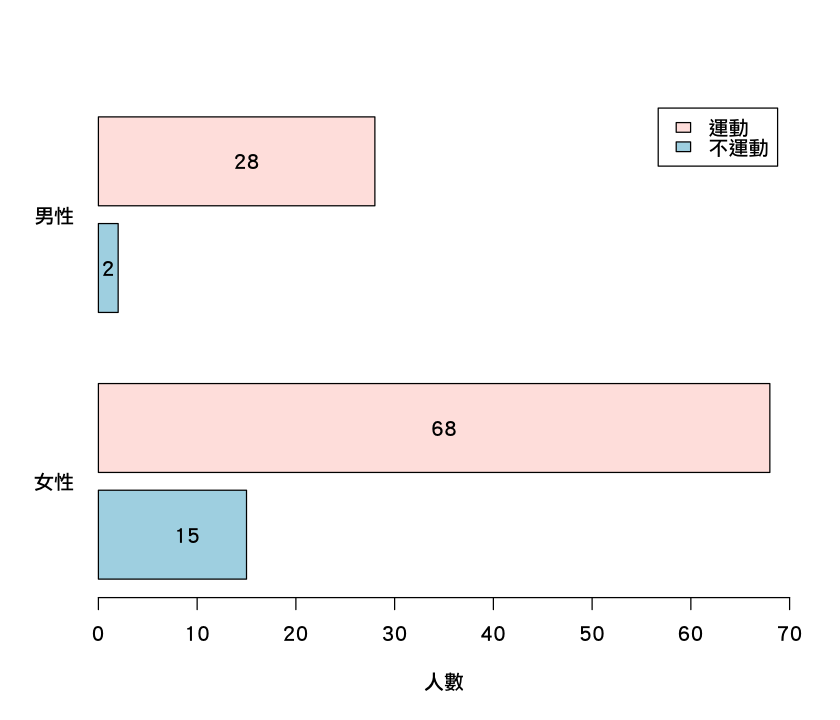

In [21]:
options(repr.plot.height=6)
par(family="LiHei Pro") 
par(las=1) # make y-label text perpendicular to axis
#par(mar=c(5,8,4,2),mgp=c(1.5,.5,0)) # increase y-axis margin.
options(warn=-1)
lbls<-c("女性","男性")

bp<-barplot(tableSport,
            beside=T,
            space=c(0.2,0.8),
            legend=c("不運動","運動"), 
            col = c("lightblue", "mistyrose"), 
            ylab="", 
            names.arg=lbls,
            xlab='人數',
            xlim = range(0:70),
            horiz=T)
text(35,2.5,tableSport[2,1])
text(15,5.5,tableSport[2,2])
text(1,4.3,tableSport[1,2])
text(9,1.3,tableSport[1,1])
text(-1,4.3,tableSport[1,2])

In [28]:
cat(sprintf("Homework_2 (2)\n"))


options(digits=8,format = "f")

cat(sprintf("Statistics of the data about age is as follows:\n"))
summary(file1$age)
cat(sprintf("and standard deviation is %.3f.",sd(file1$age)))


Homework_2 (2)
Statistics of the data about age is as follows:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 22.000  23.000  24.000  26.912  28.000  50.000 

and standard deviation is 5.905.

In [23]:
quantile(file1$age, probs = c(0, 0.25,0.5,0.75,1))

0%  25%  50%  75% 100% 
  22   23   24   28   50

In [24]:
file2<-read.csv("data/others/cholesterol.csv", header=T, sep=",")

In [25]:
dim(file2)
file2[1:5,]

[1] 100   3

,cholesterol,sens,spec
1,397.6,0.0012986692,0.99999338
2,397.5,0.001307082,0.99999331
3,397,0.001349898,0.99999292
4,392.9,0.0017523605,0.9999889
5,389.7,0.002139254,0.99998432


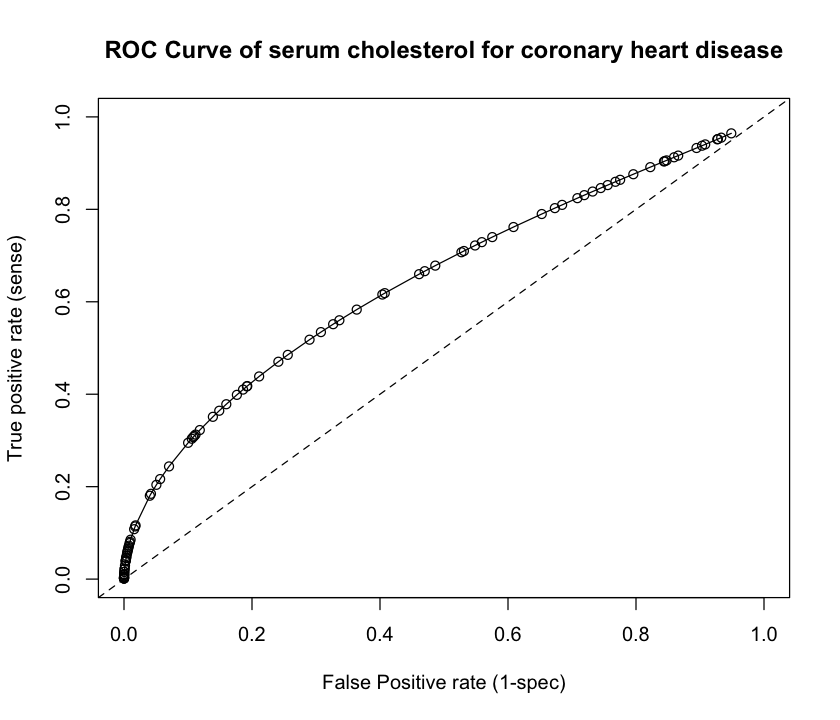

In [26]:
plot(1-file2$spec,file2$sens,xlab="False Positive rate (1-spec)",
     ylab="True positive rate (sense)", xlim=c(0,1),ylim=c(0,1),
     main="ROC Curve of serum cholesterol for coronary heart disease")
lines(1-file2$spec,file2$sens)
abline(0,1,lty=2)

In [27]:
# function used to show the computing result
#    answer(expression,variable)
answer <- function(arg1,arg2){
    cat(sprintf(arg1,arg2))
}